<a href="https://colab.research.google.com/github/ishneha1/AI_CourseWork/blob/main/AI_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (classification_report,
                            confusion_matrix,
                            accuracy_score)
from sklearn.preprocessing import LabelEncoder

# **Loading Dataset and Understanding data**


In [ ]:
data = pd.read_csv('/content/sample_data/Dhaka Obesity.csv')
# Show first 5 rows to understand the data structure
print(data.head())

   Gender  Age  Height (m)  Weight (kg) Family history of overweight  \
0    Male   29        1.65        101.0                          Yes   
1  Female   25        1.65         53.0                           No   
2    Male   23        1.70         70.0                           No   
3    Male   22        1.68        112.0                          Yes   
4    Male   19        1.75         67.0                           No   

  High caloric food consumption Vegetable consumption frequency  \
0                           Yes                       Sometimes   
1                            No                          Always   
2                            No                          Always   
3                           Yes                       Sometimes   
4                           Yes                          Always   

  Daily main meals frequency Between-meal food consumption frequency Smoking  \
0                      Three                              Frequently      No   
1   

# **Data Cleaning**

In [ ]:
# Check for missing values
print(data.isnull().sum())
# Remove duplicate rows if any
initial_count = len(data)
data.drop_duplicates(inplace=True)
final_count = len(data)
# Check for impossible values in numerical columns
print(data.describe())

Gender                                     0
Age                                        0
Height (m)                                 0
Weight (kg)                                0
Family history of overweight               0
High caloric food consumption              0
Vegetable consumption frequency            0
Daily main meals frequency                 0
Between-meal food consumption frequency    0
Smoking                                    0
Alcohol intake                             0
Daily water intake                         0
Monitor calories                           0
Physical exercise                          0
Daily device usage duration                0
Mode of transportation                     0
Obesity level                              0
dtype: int64
               Age   Height (m)  Weight (kg)
count  2157.000000  2157.000000  2157.000000
mean     26.766806     1.627144    74.021604
std       8.446704     0.101490    20.787374
min      15.000000     1.220000    35.0000

# **Data Preparation**

In [ ]:
# Convert categorical text to numbers (label encoding)

# Binary columns (direct 0/1 mapping)
binary_cols = {
    'Gender': {'Male': 1, 'Female': 0},
    'Family history of overweight': {'Yes': 1, 'No': 0},
    'High caloric food consumption': {'Yes': 1, 'No': 0},
    'Smoking': {'Yes': 1, 'No': 0},
    'Monitor calories': {'Yes': 1, 'No': 0}
}

# Ordinal columns (ordered categories)
ordinal_cols = {
    'Vegetable consumption frequency': {'Never': 0, 'Sometimes': 1, 'Always': 2},
    'Daily main meals frequency': {'Between 1-2': 0, 'Three': 1, 'More than Three': 2},
    'Between-meal food consumption frequency': {'No': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'Alcohol intake': {'I do not drink': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'Daily water intake': {'Less than a liter': 0, 'Between 1 and 2 L': 1, 'More than 2 L': 2},
    'Physical exercise': {'I do not have': 0, '1 or 2 days': 1, '2 or 4 days': 2, '4 or 5 days': 3, 'Almost Everyday': 4},
    'Daily device usage duration': {'0-2 hours': 0, '3-5 hours': 1, 'More than 5 hours': 2}
}

# Nominal columns
nominal_cols = ['Mode of transportation']

for col, mapping in binary_cols.items():
    data[col] = data[col].replace(mapping)

for col, mapping in ordinal_cols.items():
    data[col] = data[col].replace(mapping)

data = pd.get_dummies(data, columns=nominal_cols, drop_first=True)

# Encode target variable
obesity_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight': 2,
    'Obesity_Type_I': 3,
    'Obesity_Type_II': 4,
    'Obesity_Type_III': 5
}
data['Obesity level'] = data['Obesity level'].replace(obesity_mapping)

/tmp/ipython-input-5-79535660.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace(mapping)
/tmp/ipython-input-5-79535660.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace(mapping)
/tmp/ipython-input-5-79535660.py:43: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_

#**Data Visualization**

/tmp/ipython-input-6-1654049821.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Obesity level', data=data, palette='viridis')


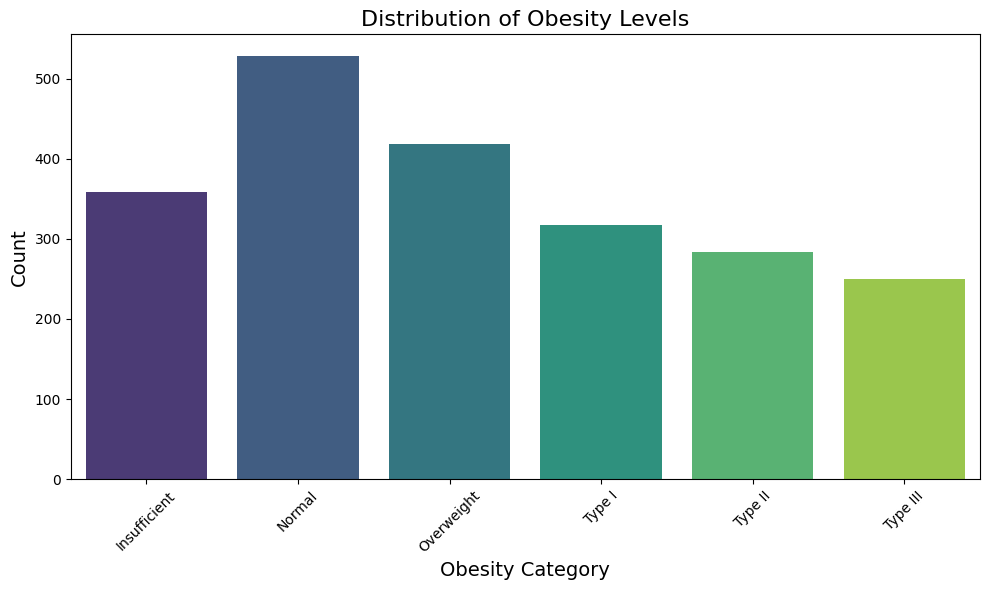

In [6]:
# 1. Distribution of Obesity Levels
plt.figure(figsize=(10, 6))
sns.countplot(x='Obesity level', data=data, palette='viridis')
plt.title('Distribution of Obesity Levels', fontsize=16)
plt.xlabel('Obesity Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0,1,2,3,4,5],
           labels=['Insufficient', 'Normal', 'Overweight',
                   'Type I', 'Type II', 'Type III'],
           rotation=45)
plt.tight_layout()
plt.savefig('obesity_distribution.png')
plt.show()


/tmp/ipython-input-7-400846374.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')


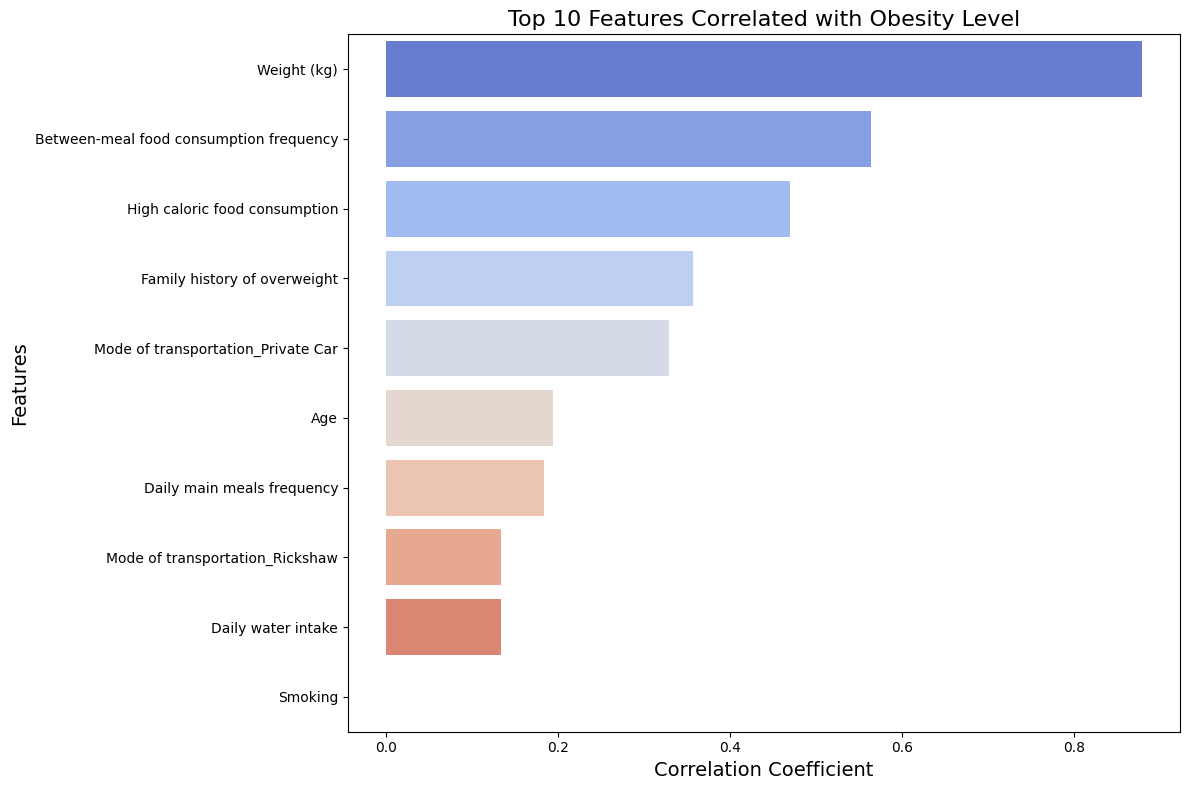

In [7]:
# 2. Correlation Heatmap (Top 10 features)
plt.figure(figsize=(12, 8))
corr = data.corr()['Obesity level'].sort_values(ascending=False)[1:11]
sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')
plt.title('Top 10 Features Correlated with Obesity Level', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.savefig('feature_correlation.png')
plt.show()

# **Input Features as X and target variable as y**

In [9]:
X = data.drop('Obesity level', axis=1)
y = data['Obesity level']

# **Splitting Dataset into training and testing**

In [10]:
# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


# **Creating and Training Model**

In [ ]:
model = DecisionTreeClassifier(
    max_depth=4,        # Limit tree depth to prevent overfitting
    min_samples_split=20, # Minimum samples required to split a node
    random_state=42     # For reproducible results
)

model.fit(X_train, y_train)